# Código Novo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install plotly --upgrade
!pip install sklearn --upgrade

     |████████████████████████████████| 13.2MB 263kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
Requirement already up-to-date: sklearn in /usr/local/lib/python3.7/dist-packages (0.0)


In [3]:
# Dataframe e matemática
import numpy as np
import pandas as pd

# Visualização

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning: Logistic Regression
from sklearn.linear_model import LogisticRegression

# Machine Learning: split, grid search e cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Métricas
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score


In [4]:
pd.options.display.float_format= "{:.5f}".format
pd.options.display.max_colwidth = 5000

In [5]:
!pip install ipython-autotime
%load_ext autotime

time: 160 µs (started: 2021-04-21 18:55:38 +00:00)


# **Código Novo**

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Trabalho em grupo/Limpa_G4")
df = df.iloc[:,1:]
df

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0
...,...,...,...,...
743,23,2,38,0
744,21,2,52,0
745,23,3,62,0
746,39,1,39,0


time: 1.15 s (started: 2021-04-21 18:55:38 +00:00)


In [7]:
# Separando X e y 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#Separando os dados em teste e treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y,  random_state= 6)

#Separando os dados de treinamento em treinamento (final) e validação

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify = y_train, random_state= 6)

# Calculando as proporções do valor 1 entre os splits
prop_real = df[df["Made Donation in March 2007"] == 1]["Made Donation in March 2007"].count()/df["Made Donation in March 2007"].count()
prop_treino = y_train[y_train == 1].count()/y_train.count()
prop_teste = y_test[y_test == 1].count()/y_test.count()
prop_validação = y_val[y_val == 1].count()/y_val.count()

# Criando um Data Frame para avaliar se a proporção de valor 1 (doou sangue em março de 2007) é identica nos datasets.
df_train_test_prop = pd.DataFrame([prop_real,prop_treino,prop_teste, prop_validação]).T
df_train_test_prop.rename(columns = {0:"Proporção Real", 1: "Proporção de Treinamento", 2: "Proporção de Teste", 3: "Proporção de Validação"}, 
                          inplace = True)

df_train_test_prop

,Proporção Real,Proporção de Treinamento,Proporção de Teste,Proporção de Validação
0,0.23797,0.23819,0.23894,0.23622


time: 78.4 ms (started: 2021-04-21 18:55:39 +00:00)


In [8]:
# Normalizando X_train

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Normalizando o resto

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

time: 8.55 ms (started: 2021-04-21 18:55:39 +00:00)


In [9]:
# Separando as métricas
métricas = ["accuracy", "precision", "recall", "f1_macro", "roc_auc"]
range(len(métricas))

range(0, 5)

time: 4.49 ms (started: 2021-04-21 18:55:39 +00:00)


In [10]:
# Criando o modelo
LR = LogisticRegression(random_state = 6)

# Separando os hiperparâmetros
hiperparametros = {"solver": ['newton-cg', 'lbfgs', 'liblinear'],
                   "penalty": ["l2"],
                   "C": [10,1,0.1,0.05],
                   "class_weight": ["balanced"]}

#Realizando o GridSearch
resultados = {}

for i in range(len(métricas)):
  
  GS = GridSearchCV(LR, hiperparametros, scoring = métricas[i])

  GS.fit(X_train, y_train)

  resultados[i] = pd.DataFrame(GS.cv_results_)



time: 1.69 s (started: 2021-04-21 18:55:39 +00:00)


In [11]:
# Renomeando o dicionário
resultados["accuracy"] = resultados.pop(0)
resultados["precision"] = resultados.pop(1)
resultados["recall"] = resultados.pop(2)
resultados["f1"] = resultados.pop(3)
resultados["roc_auc"] = resultados.pop(4)


time: 3.41 ms (started: 2021-04-21 18:55:41 +00:00)


In [12]:
print(resultados["accuracy"].sort_values("mean_test_score", ascending = False).head()["params"])
print("\n")
resultados["accuracy"].sort_values("mean_test_score", ascending = False).head()

11    {'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
9     {'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
10        {'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
8      {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
6      {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
Name: params, dtype: object




,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.00162,0.00021,0.00042,0.00004,0.05000,balanced,l2,liblinear,"{'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}",0.58824,0.73529,0.68627,0.58416,0.75248,0.66929,0.07125,1
9,0.00474,0.00058,0.00044,0.00003,0.05000,balanced,l2,newton-cg,"{'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}",0.58824,0.73529,0.68627,0.57426,0.69307,0.65543,0.06301,2
10,0.00346,0.00058,0.00041,0.00001,0.05000,balanced,l2,lbfgs,"{'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}",0.58824,0.73529,0.68627,0.57426,0.69307,0.65543,0.06301,2
8,0.00142,0.00010,0.00039,0.00002,0.10000,balanced,l2,liblinear,"{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}",0.58824,0.73529,0.66667,0.59406,0.67327,0.65150,0.05482,4
6,0.00602,0.00228,0.00051,0.00012,0.10000,balanced,l2,newton-cg,"{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}",0.58824,0.74510,0.66667,0.57426,0.68317,0.65149,0.06319,5


time: 47.5 ms (started: 2021-04-21 18:55:41 +00:00)


In [13]:
print(resultados["precision"].sort_values("mean_test_score", ascending = False).head()["params"])
print("\n")
resultados["precision"].sort_values("mean_test_score", ascending = False).head()

11    {'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
8      {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
9     {'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
10        {'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
6      {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
Name: params, dtype: object




,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.00152,0.00008,0.00099,0.00002,0.05000,balanced,l2,liblinear,"{'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}",0.33333,0.45455,0.40541,0.29545,0.48485,0.39472,0.07133,1
8,0.00152,0.00016,0.00105,0.00008,0.10000,balanced,l2,liblinear,"{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}",0.33333,0.45714,0.38462,0.29268,0.38462,0.37048,0.05539,2
9,0.00455,0.00051,0.00106,0.00005,0.05000,balanced,l2,newton-cg,"{'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}",0.33929,0.45161,0.40541,0.24324,0.41026,0.36996,0.07286,3
10,0.00344,0.00023,0.00107,0.00009,0.05000,balanced,l2,lbfgs,"{'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}",0.33929,0.45161,0.40541,0.24324,0.41026,0.36996,0.07286,3
6,0.00507,0.00135,0.00105,0.00003,0.10000,balanced,l2,newton-cg,"{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}",0.33929,0.47059,0.38462,0.24324,0.40000,0.36755,0.07512,5


time: 45.1 ms (started: 2021-04-21 18:55:41 +00:00)


In [14]:
print(resultados["recall"].sort_values("mean_test_score", ascending = False).head()["params"])
print("\n")
resultados["recall"].sort_values("mean_test_score", ascending = False).head()

0    {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
1        {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
2    {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
3     {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
4         {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Name: params, dtype: object




,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.00698,0.00251,0.00140,0.00041,10,balanced,l2,newton-cg,"{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}",0.79167,0.91667,0.68000,0.70833,0.62500,0.74433,0.10160,1
1,0.00551,0.00151,0.00109,0.00006,10,balanced,l2,lbfgs,"{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}",0.79167,0.91667,0.68000,0.70833,0.62500,0.74433,0.10160,1
2,0.00157,0.00016,0.00098,0.00002,10,balanced,l2,liblinear,"{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}",0.79167,0.91667,0.68000,0.70833,0.62500,0.74433,0.10160,1
3,0.00444,0.00035,0.00099,0.00002,1,balanced,l2,newton-cg,"{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}",0.79167,0.91667,0.68000,0.62500,0.66667,0.73600,0.10583,4
4,0.00511,0.00136,0.00118,0.00028,1,balanced,l2,lbfgs,"{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}",0.79167,0.91667,0.68000,0.62500,0.66667,0.73600,0.10583,4


time: 49.4 ms (started: 2021-04-21 18:55:41 +00:00)


In [15]:
print(resultados["f1"].sort_values("mean_test_score", ascending = False).head()["params"])
print("\n")
resultados["f1"].sort_values("mean_test_score", ascending = False).head()

11    {'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
0       {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
1           {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
2       {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
8      {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Name: params, dtype: object




,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.00192,0.00069,0.00107,0.00009,0.05000,balanced,l2,liblinear,"{'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}",0.56410,0.67132,0.62926,0.53446,0.69449,0.61873,0.06116,1
0,0.00522,0.00078,0.00106,0.00011,10,balanced,l2,newton-cg,"{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}",0.56815,0.67318,0.60853,0.60649,0.55478,0.60222,0.04124,2
1,0.00456,0.00053,0.00097,0.00002,10,balanced,l2,lbfgs,"{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}",0.56815,0.67318,0.60853,0.60649,0.55478,0.60222,0.04124,2
2,0.00185,0.00031,0.00114,0.00024,10,balanced,l2,liblinear,"{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}",0.56815,0.67318,0.60853,0.60649,0.55478,0.60222,0.04124,2
8,0.00147,0.00006,0.00097,0.00008,0.10000,balanced,l2,liblinear,"{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}",0.56410,0.67808,0.61295,0.53498,0.61939,0.60190,0.04927,5


time: 49.7 ms (started: 2021-04-21 18:55:41 +00:00)


In [16]:
print(resultados["roc_auc"].sort_values("mean_test_score", ascending = False).head()["params"])
print("\n")
resultados["roc_auc"].sort_values("mean_test_score", ascending = False).head()

0    {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
1        {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
2    {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
5     {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
3     {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
Name: params, dtype: object




,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.00615,0.00084,0.00145,0.00010,10,balanced,l2,newton-cg,"{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}",0.70139,0.85764,0.72545,0.66748,0.68236,0.72686,0.06821,1
1,0.00562,0.00093,0.00165,0.00051,10,balanced,l2,lbfgs,"{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}",0.70139,0.85764,0.72545,0.66748,0.68236,0.72686,0.06821,1
2,0.00177,0.00009,0.00137,0.00002,10,balanced,l2,liblinear,"{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}",0.70085,0.85710,0.72545,0.66748,0.68236,0.72665,0.06804,3
5,0.00152,0.00005,0.00126,0.00005,1,balanced,l2,liblinear,"{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}",0.69872,0.85337,0.72494,0.63663,0.68723,0.72018,0.07251,4
3,0.00514,0.00066,0.00131,0.00008,1,balanced,l2,newton-cg,"{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}",0.69712,0.85443,0.72494,0.63609,0.68669,0.71985,0.07317,5


time: 53.5 ms (started: 2021-04-21 18:55:41 +00:00)


## Seleção dos melhores modelos (por métrica) e resultados preliminares 

Por ser uma técnica simples de separação a Regressão Logística apresenta resultados rápidos. Ainda assim modelos mais "rápidos" de serem executados parecem apresentar melhor performance das métricas precisão, acurácia e recall. Modelos mais "demorados" apresentam melhores resultados nas métricas de F1 e ROC.

Como existe uma preocupação grande em acertar as classes de doadores, optei por escolher o melhor modelo que segundo os resultados da pontuação F1.

In [18]:
melhores_modelos = {"accuracy": resultados["accuracy"].sort_values("mean_test_score", ascending = False).iloc[0,9],
                    "precision": resultados["precision"].sort_values("mean_test_score", ascending = False).iloc[0,9],
                    "recall":resultados["recall"].sort_values("mean_test_score", ascending = False).iloc[0,9],
                    "f1": resultados["f1"].sort_values("mean_test_score", ascending = False).iloc[0,9],
                    "roc_auc": resultados["roc_auc"].sort_values("mean_test_score", ascending = False).iloc[0,9]}


time: 17.6 ms (started: 2021-04-21 18:59:12 +00:00)


In [19]:
# Visualisando os hiperparâmetros
melhores_modelos

{'accuracy': 0.5882352941176471,
 'f1': 0.5641025641025641,
 'precision': 0.3333333333333333,
 'recall': 0.7916666666666666,
 'roc_auc': 0.7013888888888888}

time: 11.6 ms (started: 2021-04-21 18:59:14 +00:00)


## Treinamento e teste

In [20]:
# Treinando e testando a LogisticRegression com os "melhores" hiperparâmetros
LR = LogisticRegression(C = 0.05, 
                        class_weight = "balanced",
                        penalty = "l2",
                        solver = "liblinear",
                        random_state = 6).fit(X_train,y_train)

# Prevendo y
y_pred = LR.predict(X_val)

time: 7.9 ms (started: 2021-04-21 18:59:19 +00:00)


In [21]:
# Separando as métricas
Acurácia = accuracy_score(y_val, y_pred)
Precisão =  precision_score(y_val, y_pred)
Recall = recall_score(y_val, y_pred)
F1 = f1_score(y_val, y_pred, average = "macro")
ROC = roc_auc_score(y_val, y_pred)


time: 9.19 ms (started: 2021-04-21 18:59:20 +00:00)


In [22]:
# Organizando as métricas em um DataFrame
resultados_val = pd.DataFrame({"Acurácia":Acurácia,
                                "Precisão": Precisão,
                                "Recall": Recall,
                                "F1": F1,
                                "ROC": ROC}, index = [0])

time: 5.29 ms (started: 2021-04-21 18:59:20 +00:00)


In [23]:
# Visualizando os resultados
resultados_val

,Acurácia,Precisão,Recall,F1,ROC
0,0.72441,0.43590,0.56667,0.65178,0.66993


time: 18.7 ms (started: 2021-04-21 18:59:20 +00:00)


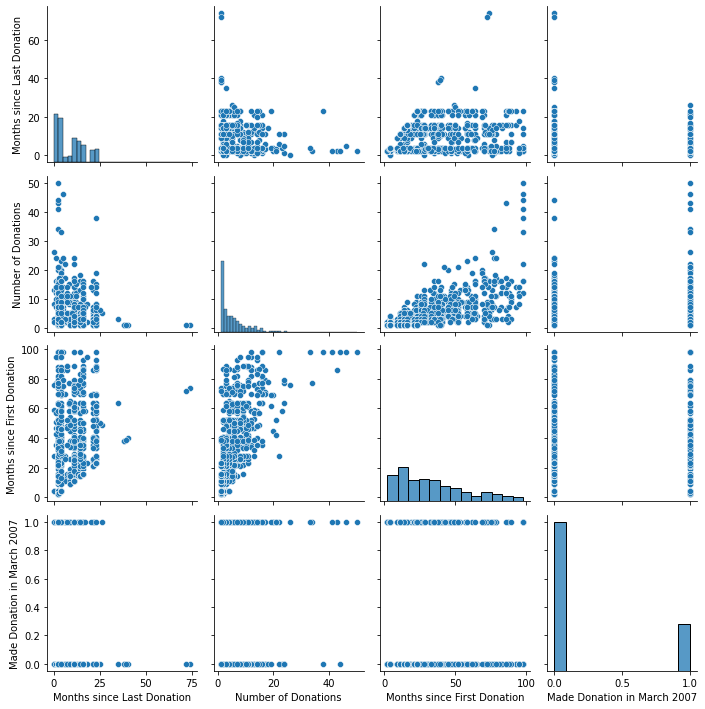

time: 6.56 s (started: 2021-04-21 19:57:28 +00:00)


In [24]:
sns.pairplot(df)

In [54]:
predições = LR.predict_proba(X_val)

time: 2.44 ms (started: 2021-04-21 20:06:15 +00:00)


In [55]:
predições

array([[0.47000786, 0.52999214],
       [0.4953948 , 0.5046052 ],
       [0.506517  , 0.493483  ],
       [0.50011593, 0.49988407],
       [0.50341854, 0.49658146],
       [0.50564754, 0.49435246],
       [0.47498938, 0.52501062],
       [0.5011666 , 0.4988334 ],
       [0.49662691, 0.50337309],
       [0.50348379, 0.49651621],
       [0.49031382, 0.50968618],
       [0.51232257, 0.48767743],
       [0.52832019, 0.47167981],
       [0.49445154, 0.50554846],
       [0.52675656, 0.47324344],
       [0.51525591, 0.48474409],
       [0.51737777, 0.48262223],
       [0.52832019, 0.47167981],
       [0.49306041, 0.50693959],
       [0.52674764, 0.47325236],
       [0.51729739, 0.48270261],
       [0.50892757, 0.49107243],
       [0.48664115, 0.51335885],
       [0.52832019, 0.47167981],
       [0.508056  , 0.491944  ],
       [0.49658443, 0.50341557],
       [0.52308884, 0.47691116],
       [0.50652147, 0.49347853],
       [0.49241719, 0.50758281],
       [0.49290352, 0.50709648],
       [0.

time: 8.1 ms (started: 2021-04-21 20:06:22 +00:00)


In [37]:
LR.predict_proba()

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

time: 9.27 ms (started: 2021-04-21 20:00:34 +00:00)


In [35]:
y_val.values

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

time: 11.6 ms (started: 2021-04-21 20:00:17 +00:00)
